In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading the two datasets
satellite_data = pd.read_csv('satellite_metadata.csv')
hydrologic_data = pd.read_csv('add_timestamp_merged_data.csv')

In [14]:
# Converting timestamp and date columns to datetime format for proper merging
satellite_data['timestamp'] = pd.to_datetime(satellite_data['timestamp'])
hydrologic_data['date'] = pd.to_datetime(hydrologic_data['date'])

In [15]:
# Merging the datasets on timestamp and date columns
# Using left join to keep all satellite data rows
dataset = satellite_data.merge(
    hydrologic_data[['date', 'discharge_cum', 'water_level', 'soil_moisture_om', 'precipitation_cum_mm']],
    left_on='timestamp',
    right_on='date',
    how='left'
)

In [16]:
# Dropping the duplicate date column if you want to keep only timestamp
dataset = dataset.drop('date', axis=1)


In [17]:
dataset.head()

,system:index,image_id,timestamp,.geo,discharge_cum,water_level,soil_moisture_om,precipitation_cum_mm
0,20200401T102021_20200401T102432_T32TPT,0,2020-04-01,"{""type"":""MultiPoint"",""coordinates"":[]}",9860.79,22.0,0.378250,6048.4
1,20200403T100549_20200403T100808_T32TPT,1,2020-04-03,"{""type"":""MultiPoint"",""coordinates"":[]}",9868.31,22.0,0.370750,6048.4
2,20200406T101559_20200406T102723_T32TPT,2,2020-04-06,"{""type"":""MultiPoint"",""coordinates"":[]}",9879.41,22.0,0.380667,6048.4
3,20200408T101021_20200408T101022_T32TPT,3,2020-04-08,"{""type"":""MultiPoint"",""coordinates"":[]}",9886.82,22.0,0.417208,6048.4
4,20200411T102021_20200411T102438_T32TPT,4,2020-04-11,"{""type"":""MultiPoint"",""coordinates"":[]}",9897.93,22.0,0.425167,6048.4


In [18]:
# Adding a new column "delta_discharge" to calculate the difference in discharge_cum
dataset['delta_discharge'] = dataset['discharge_cum'].diff() 
dataset['delta_discharge'] = dataset['delta_discharge'].fillna(0)



In [19]:
dataset.head()

,system:index,image_id,timestamp,.geo,discharge_cum,water_level,soil_moisture_om,precipitation_cum_mm,delta_discharge
0,20200401T102021_20200401T102432_T32TPT,0,2020-04-01,"{""type"":""MultiPoint"",""coordinates"":[]}",9860.79,22.0,0.378250,6048.4,0.00
1,20200403T100549_20200403T100808_T32TPT,1,2020-04-03,"{""type"":""MultiPoint"",""coordinates"":[]}",9868.31,22.0,0.370750,6048.4,7.52
2,20200406T101559_20200406T102723_T32TPT,2,2020-04-06,"{""type"":""MultiPoint"",""coordinates"":[]}",9879.41,22.0,0.380667,6048.4,11.10
3,20200408T101021_20200408T101022_T32TPT,3,2020-04-08,"{""type"":""MultiPoint"",""coordinates"":[]}",9886.82,22.0,0.417208,6048.4,7.41
4,20200411T102021_20200411T102438_T32TPT,4,2020-04-11,"{""type"":""MultiPoint"",""coordinates"":[]}",9897.93,22.0,0.425167,6048.4,11.11


In [20]:
# Adding a new column "delta_precipitation" to calculate the difference in precipitation_cum
dataset['delta_precipitation'] = dataset['precipitation_cum_mm'].diff()
dataset['delta_precipitation'] = dataset['delta_precipitation'].fillna(0)

In [16]:
dataset.head()

,system:index,image_id,timestamp,.geo,discharge_cum,water_level,soil_moisture_om,precipitation_cum_mm,delta_discharge,delta_precipitation
0,20200401T102021_20200401T102432_T32TPT,0,2020-04-01,"{""type"":""MultiPoint"",""coordinates"":[]}",9860.79,22.0,0.378250,6048.4,0.00,0.0
1,20200403T100549_20200403T100808_T32TPT,1,2020-04-03,"{""type"":""MultiPoint"",""coordinates"":[]}",9868.31,22.0,0.370750,6048.4,7.52,0.0
2,20200406T101559_20200406T102723_T32TPT,2,2020-04-06,"{""type"":""MultiPoint"",""coordinates"":[]}",9879.41,22.0,0.380667,6048.4,11.10,0.0
3,20200408T101021_20200408T101022_T32TPT,3,2020-04-08,"{""type"":""MultiPoint"",""coordinates"":[]}",9886.82,22.0,0.417208,6048.4,7.41,0.0
4,20200411T102021_20200411T102438_T32TPT,4,2020-04-11,"{""type"":""MultiPoint"",""coordinates"":[]}",9897.93,22.0,0.425167,6048.4,11.11,0.0


In [21]:
# Saving the resulting dataframe to a CSV file
dataset.to_csv('delta_dataset.csv', index=False)

In [22]:
# Information about the resulting dataset
print(f"Original satellite data shape: {satellite_data.shape}")
print(f"Original hydrologic data shape: {hydrologic_data.shape}")
print(f"Combined dataset shape: {dataset.shape}")
print("\nFirst 5 rows of the combined dataset:")
print(dataset.head())

Original satellite data shape: (80, 4)
Original hydrologic data shape: (3567, 7)
Combined dataset shape: (80, 10)

First 5 rows of the combined dataset:
                             system:index  image_id  timestamp  \
0  20200401T102021_20200401T102432_T32TPT         0 2020-04-01   
1  20200403T100549_20200403T100808_T32TPT         1 2020-04-03   
2  20200406T101559_20200406T102723_T32TPT         2 2020-04-06   
3  20200408T101021_20200408T101022_T32TPT         3 2020-04-08   
4  20200411T102021_20200411T102438_T32TPT         4 2020-04-11   

                                     .geo  discharge_cum  water_level  \
0  {"type":"MultiPoint","coordinates":[]}        9860.79         22.0   
1  {"type":"MultiPoint","coordinates":[]}        9868.31         22.0   
2  {"type":"MultiPoint","coordinates":[]}        9879.41         22.0   
3  {"type":"MultiPoint","coordinates":[]}        9886.82         22.0   
4  {"type":"MultiPoint","coordinates":[]}        9897.93         22.0   

   soil_moi

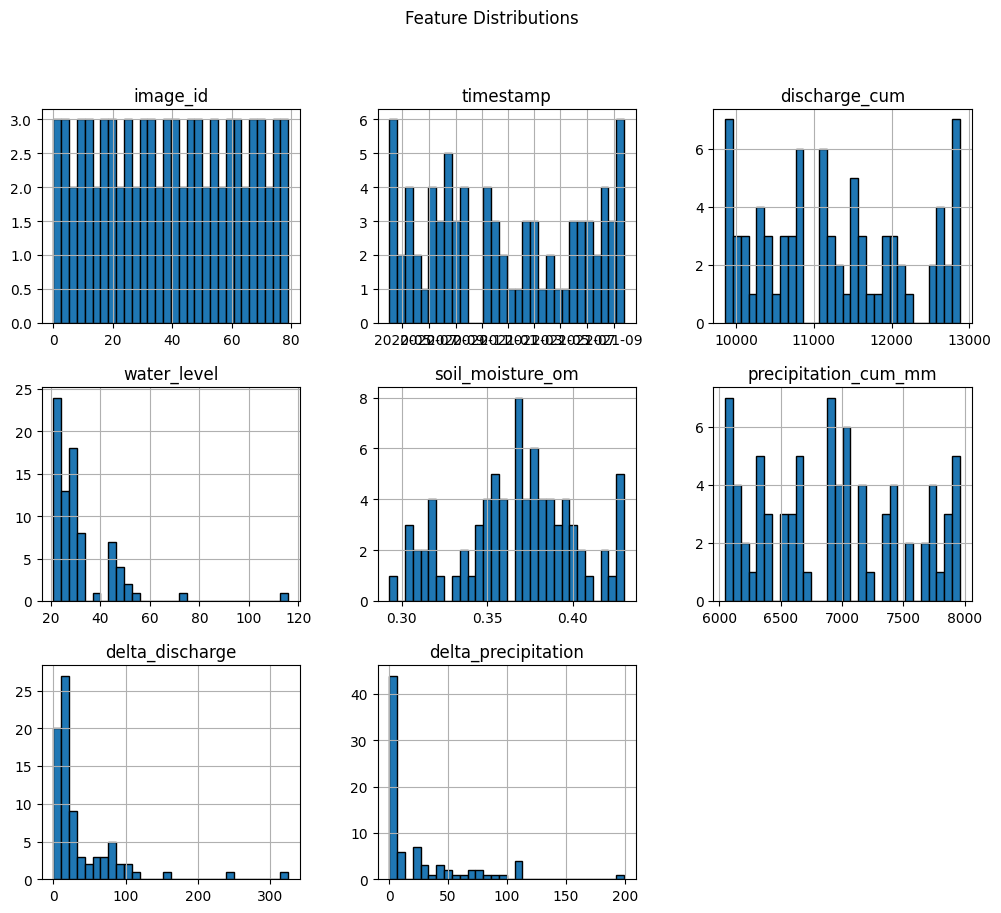

In [23]:
# Histograms of features
dataset.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle('Feature Distributions')
plt.show()

In [26]:
# Summary Statistics
print("Summary Statistics:")
print(dataset.describe())



dataset.head()




Summary Statistics:
       image_id            timestamp  discharge_cum  water_level  \
count   80.0000                   80      80.000000    80.000000   
mean    39.5000  2020-12-22 22:30:00   11272.410500    31.650000   
min      0.0000  2020-04-01 00:00:00    9860.790000    21.000000   
25%     19.7500  2020-07-29 06:00:00   10459.935000    23.000000   
50%     39.5000  2020-11-25 12:00:00   11166.830000    28.000000   
75%     59.2500  2021-06-15 12:00:00   12037.190000    32.000000   
max     79.0000  2021-09-25 00:00:00   12879.640000   116.000000   
std     23.2379                  NaN     955.247193    13.787813   

       soil_moisture_om  precipitation_cum_mm  delta_discharge  \
count         80.000000             80.000000        80.000000   
mean           0.367290           6929.961250        37.735625   
min            0.292667           6048.400000         0.000000   
25%            0.349083           6409.475000        10.872500   
50%            0.369875           689

,system:index,image_id,timestamp,.geo,discharge_cum,water_level,soil_moisture_om,precipitation_cum_mm,delta_discharge,delta_precipitation
0,20200401T102021_20200401T102432_T32TPT,0,2020-04-01,"{""type"":""MultiPoint"",""coordinates"":[]}",9860.79,22.0,0.378250,6048.4,0.00,0.0
1,20200403T100549_20200403T100808_T32TPT,1,2020-04-03,"{""type"":""MultiPoint"",""coordinates"":[]}",9868.31,22.0,0.370750,6048.4,7.52,0.0
2,20200406T101559_20200406T102723_T32TPT,2,2020-04-06,"{""type"":""MultiPoint"",""coordinates"":[]}",9879.41,22.0,0.380667,6048.4,11.10,0.0
3,20200408T101021_20200408T101022_T32TPT,3,2020-04-08,"{""type"":""MultiPoint"",""coordinates"":[]}",9886.82,22.0,0.417208,6048.4,7.41,0.0
4,20200411T102021_20200411T102438_T32TPT,4,2020-04-11,"{""type"":""MultiPoint"",""coordinates"":[]}",9897.93,22.0,0.425167,6048.4,11.11,0.0


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   system:index                80 non-null     object        
 1   image_id                    80 non-null     int64         
 2   timestamp                   80 non-null     datetime64[ns]
 3   .geo                        80 non-null     object        
 4   discharge_cum               80 non-null     float64       
 5   water_level                 80 non-null     float64       
 6   soil_moisture_om            80 non-null     float64       
 7   precipitation_cum_mm        80 non-null     float64       
 8   delta_discharge             80 non-null     float64       
 9   delta_precipitation         80 non-null     float64       
 10  delta_precipitation_lagged  79 non-null     float64       
 11  water_level_rolling         74 non-null     float

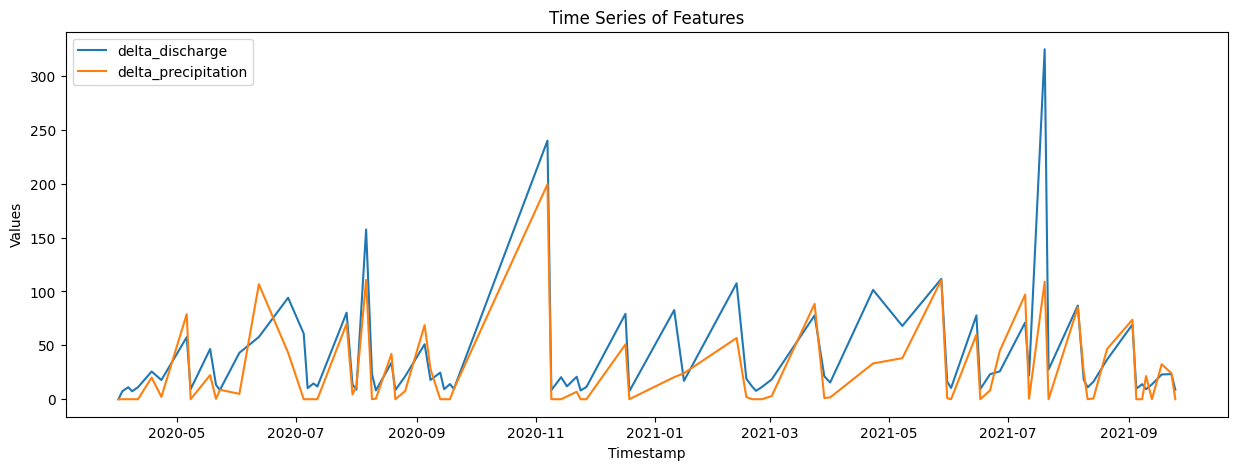

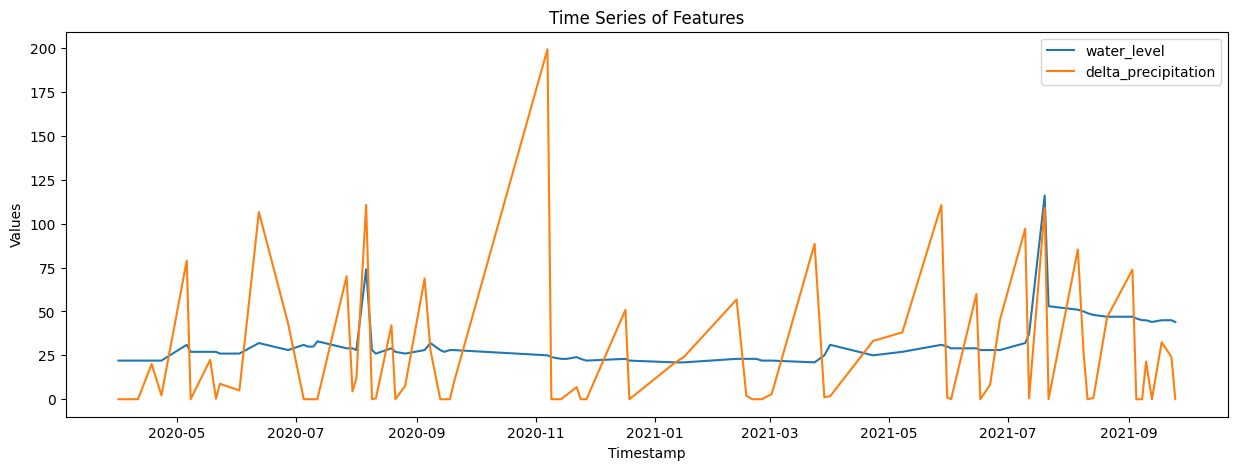

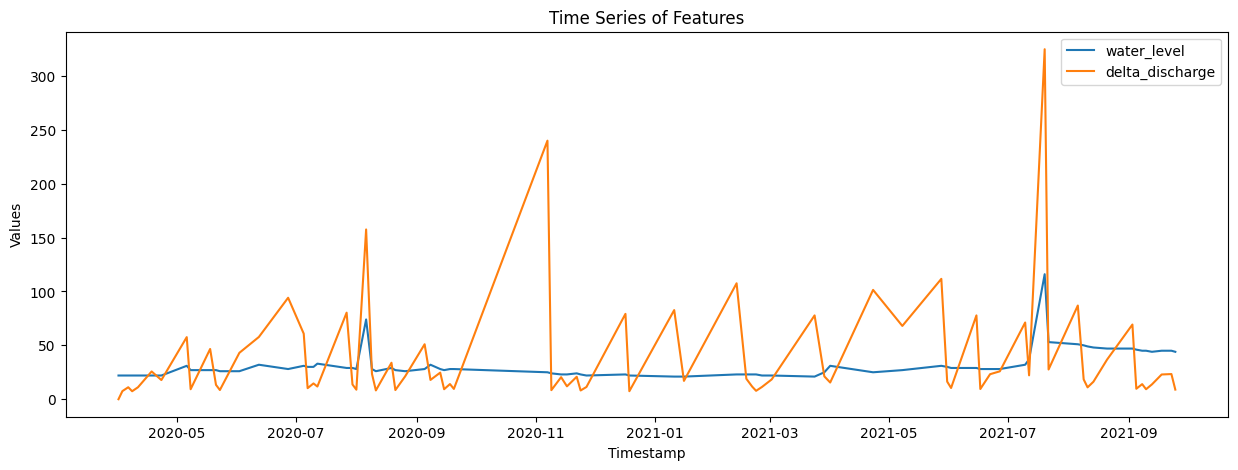

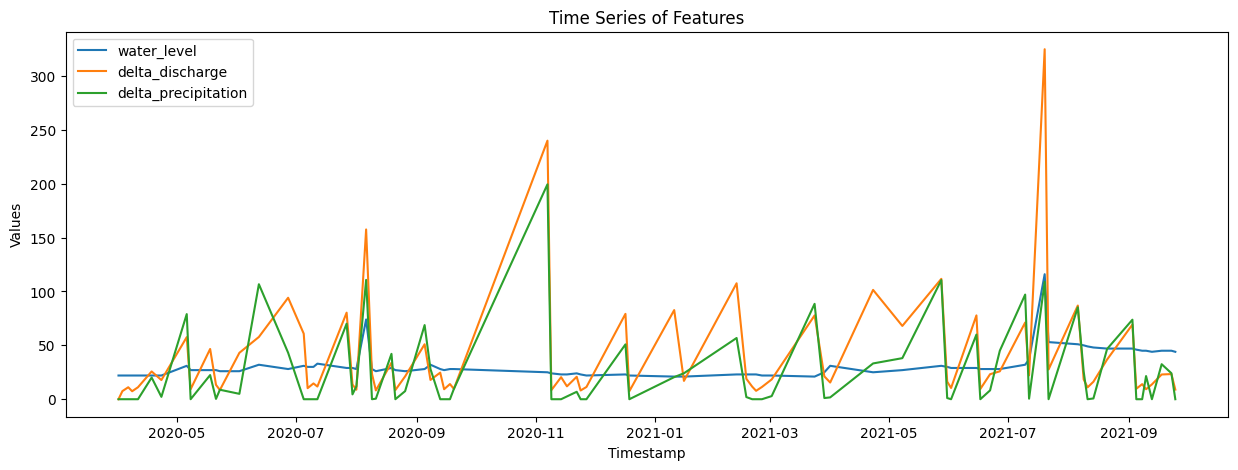

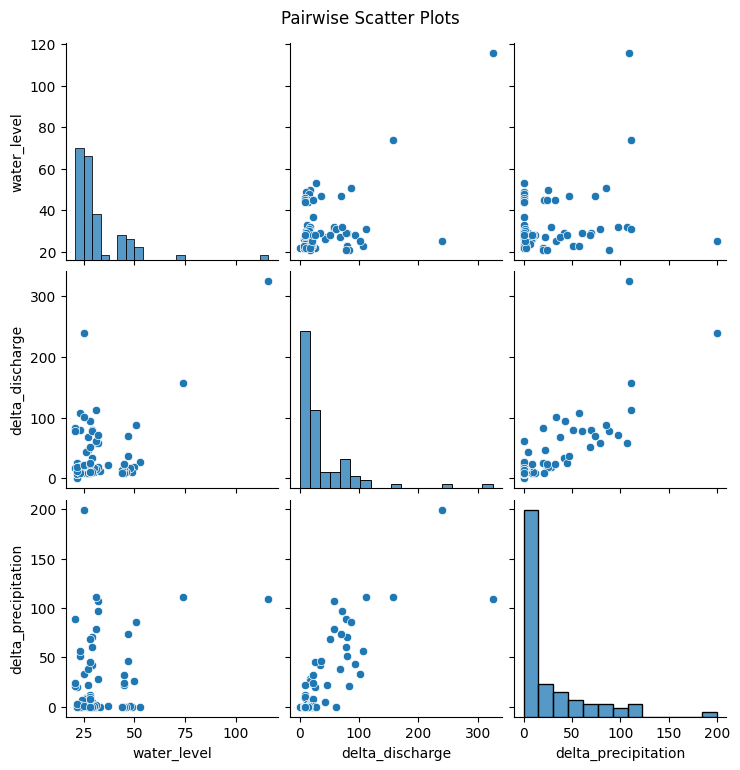

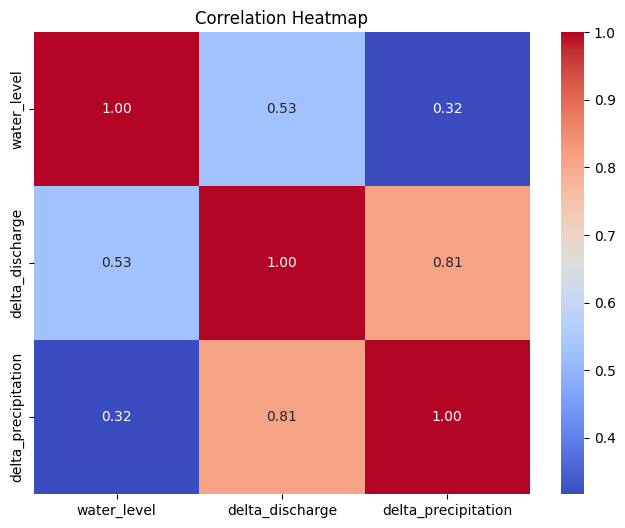


Lagged Correlation:
                            water_level  delta_precipitation_lagged
water_level                    1.000000                    0.038626
delta_precipitation_lagged     0.038626                    1.000000


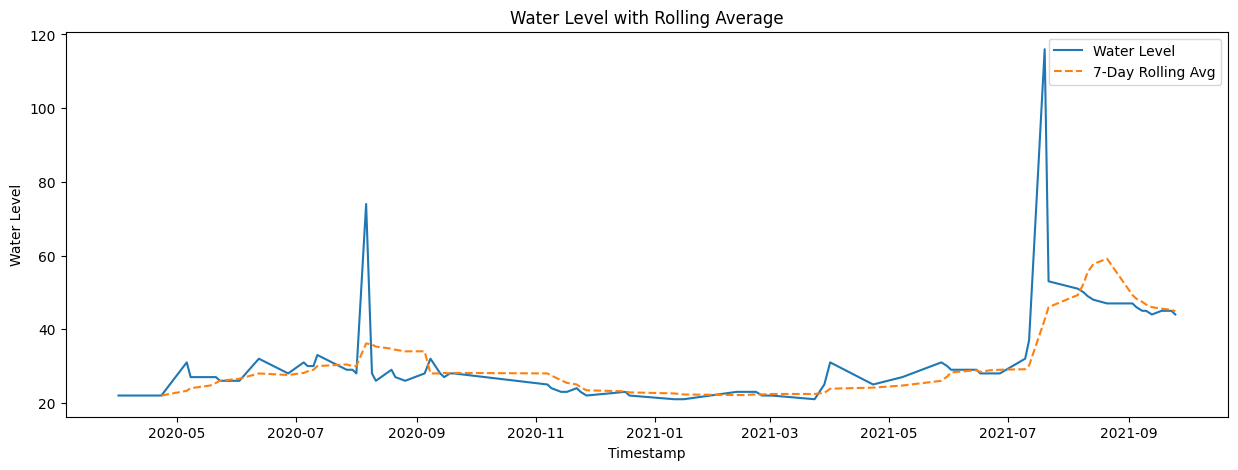

In [34]:
import seaborn as sns


# Convert timestamp to datetime
dataset['timestamp'] = pd.to_datetime(dataset['timestamp'])

# Check for missing values and data types
print("Data Info:")
print(dataset.info())
print("\nMissing Values:")
print(dataset.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
print(dataset[['water_level', 'delta_discharge', 'delta_precipitation']].describe())

# Time series plots 2 x
plt.figure(figsize=(15, 5))
for feature in ['delta_discharge', 'delta_precipitation']:
    plt.plot(dataset['timestamp'], dataset[feature], label=feature)
plt.title('Time Series of Features')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.legend()
plt.show()


# Time series plots 2x
plt.figure(figsize=(15, 5))
for feature in ['water_level', 'delta_precipitation']:
    plt.plot(dataset['timestamp'], dataset[feature], label=feature)
plt.title('Time Series of Features')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.legend()
plt.show()

# Time series plots 2x
plt.figure(figsize=(15, 5))
for feature in ['water_level', 'delta_discharge']:
    plt.plot(dataset['timestamp'], dataset[feature], label=feature)
plt.title('Time Series of Features')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.legend()
plt.show()

# Time series plots 3x
plt.figure(figsize=(15, 5))
for feature in ['water_level', 'delta_discharge', 'delta_precipitation']:
    plt.plot(dataset['timestamp'], dataset[feature], label=feature)
plt.title('Time Series of Features')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.legend()
plt.show()

# Pairwise scatter plots
sns.pairplot(dataset[['water_level', 'delta_discharge', 'delta_precipitation']])
plt.suptitle('Pairwise Scatter Plots', y=1.02)
plt.show()

# Correlation heatmap
correlation_matrix = dataset[['water_level', 'delta_discharge', 'delta_precipitation']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Lagged correlation analysis (example: delta_precipitation vs water level)
dataset['delta_precipitation_lagged'] = dataset['delta_precipitation'].shift(1)
lagged_corr = dataset[['water_level', 'delta_precipitation_lagged']].corr()
print("\nLagged Correlation:")
print(lagged_corr)

# Rolling averages (example: water level)
dataset['water_level_rolling'] = dataset['water_level'].rolling(window=7).mean()
plt.figure(figsize=(15, 5))
plt.plot(dataset['timestamp'], dataset['water_level'], label='Water Level')
plt.plot(dataset['timestamp'], dataset['water_level_rolling'], label='7-Day Rolling Avg', linestyle='--')
plt.title('Water Level with Rolling Average')
plt.xlabel('Timestamp')
plt.ylabel('Water Level')
plt.legend()
plt.show()

